In [1]:
%pylab inline
import numpy as np
from parametric_pde_find import *
from scipy.integrate import odeint
from numpy.fft import fft, ifft, fftfreq
from time import time
import threshold_BGLSS
import matplotlib.pyplot as plt
import seaborn as sns

fontsize = 20

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
importlib.reload(threshold_BGLSS)
from threshold_BGLSS import *

## Define the PDE

In [3]:
def advection_rhs(u, t, params):
    
    k, L, x = params    
    kappa = -1.5 + 1.0*np.cos(2*x*np.pi/L)
    deriv = ifft(1j*k*fft(kappa*u)) + 0.1*ifft(-k**2*fft(u))

    return real(deriv)

## Solve the PDE

In [4]:
# Set size of grid
n = 256
m = 256
L = 5

# Set up grid
x = np.linspace(-L,L,n+1)[:-1];   dx = x[1]-x[0]
t = np.linspace(0,5,m);         dt = t[1]-t[0]
k = 2*np.pi*fftfreq(n, d = dx)

# Initial condition
np.random.seed(0)
u0 = np.cos(2*x*np.pi/L)
u01 = np.exp(-x**2)

# Solve with time dependent u_x term
params = (k,L,x)
u = odeint(advection_rhs, u0, t, args=(params,)).T
u1 = odeint(advection_rhs, u01, t, args=(params,)).T

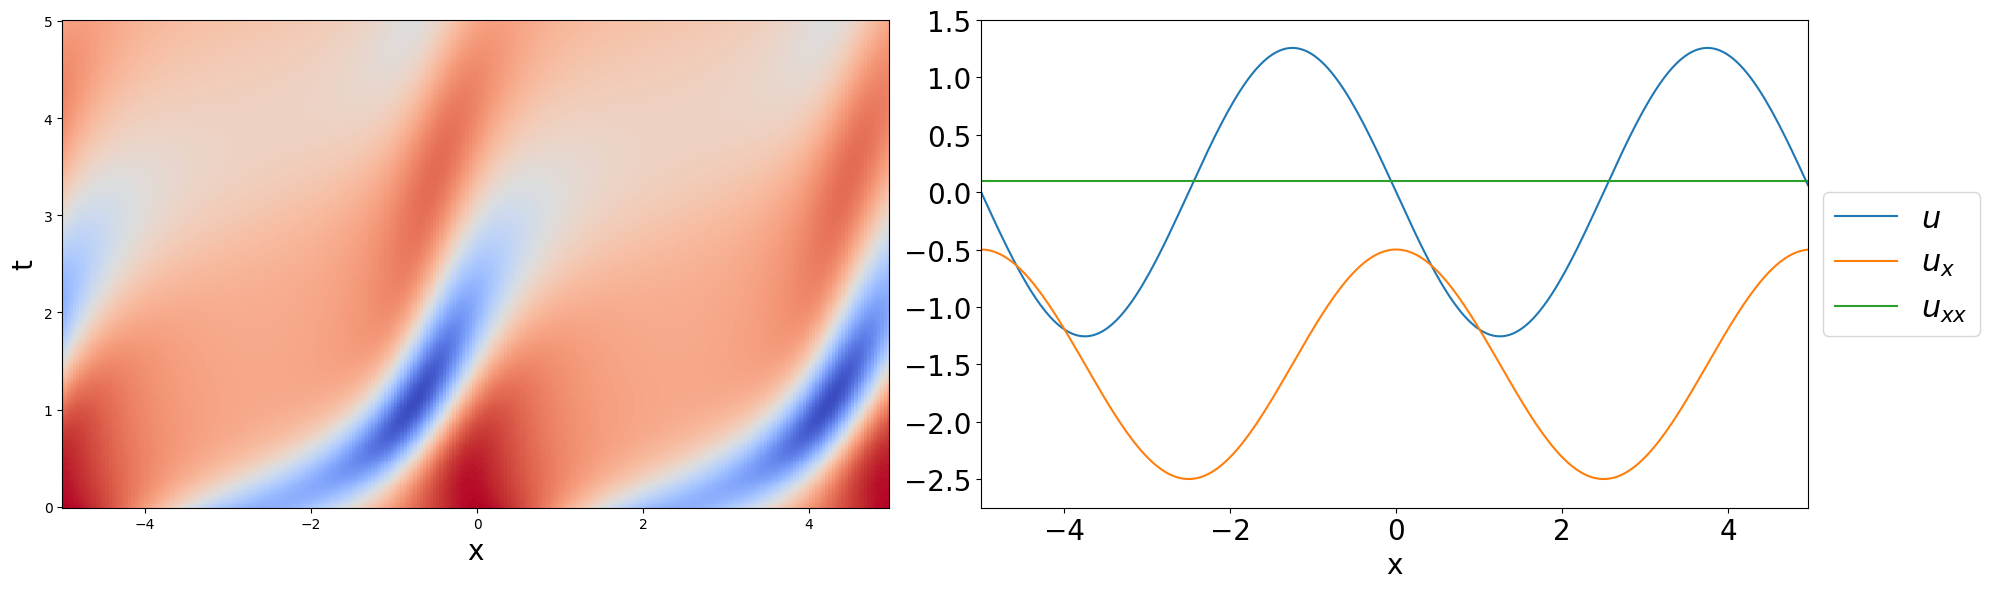

In [5]:
# Plot
u_x_true = -1.5 + 1.0*np.cos(2*x*np.pi/L) 
u_true = -2*np.pi/L*np.sin(2*x*np.pi/L)
u_xx_true = 0.1*np.ones(n)

fig = figure(figsize=(20,6))
X, T = np.meshgrid(x, t)

subplot(1,2,1)
pcolor(X, T, u.T, cmap=cm.coolwarm)
xlabel('x', fontsize = fontsize)
ylabel('t', fontsize = fontsize)
xlim([x[0],x[-1]])

subplot(1,2,2)
plot(x,u_true, label='$u$')
plot(x,u_x_true, label='$u_{x}$')
plot(x,u_xx_true, label='$u_{xx}$')
xlim([x[0],x[-1]])
ylim([-2.75, 1.5])

plt.rcParams['figure.figsize'] = (4, 4)
plt.xticks(fontsize = fontsize)
plt.yticks(fontsize = fontsize)
xlabel('x', fontsize = fontsize)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = fontsize+2)
fig.tight_layout()
fig.savefig("AD.png", dpi=200)

## Build the Regression Model

In [6]:
un = u + 0.01*np.std(u)*np.random.randn(n,m)

In [7]:
# Build linear systems
wx = 10  
wt = 10  

deg_x = 6
deg_t = 4
 
Utn, Thetan, rhs_des = build_linear_system(un, dt, dx, D=4, P=3, time_diff = 'poly',
                                       deg_x = deg_x, deg_t = deg_t, 
                                       width_x = wx, width_t = wt)
n2 = n - 2*wx
m2 = m - 2*wt

In [8]:
# Group by location
Thetan_grouped = [real(Thetan[n2*np.arange(m2)+j,:]) for j in range(n2)]
Utn_grouped = [real(Utn[n2*np.arange(m2)+j]) for j in range(n2)]

In [9]:
xi_n, lam_n, loss_n, path_n, coef_n, remain_n = thresholdBGLSS(Thetan_grouped, Utn_grouped, niter = 600, burnin = 100, threshold = 10**-2)

0
20
Update:
0
Lambda2:
1.2564955109783547

Update:
1
Lambda2:
1.402575634473353

Update:
2
Lambda2:
1.4905427578034403

Update:
3
Lambda2:
1.5527992631447678

Update:
4
Lambda2:
1.5958833545916142

Update:
5
Lambda2:
1.6304451964204503

Update:
6
Lambda2:
1.6479788385035306

Update:
7
Lambda2:
1.671543279734447

Update:
8
Lambda2:
1.684309186979752

Update:
9
Lambda2:
1.6892072981857802

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
17

/home/yifan/Documents/code_equation_learn/figures/threshold_BGLSS.py:206: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  candidate_norms[i] = Norm(np.vstack(A[:,i] for A in As), loss_normalize)


[0, 1, 2, 4, 5, 8, 9]
0
7
Update:
0
Lambda2:
1.7619274037982655

Update:
1
Lambda2:
2.034453915610331

Update:
2
Lambda2:
2.1890709389572858

Update:
3
Lambda2:
2.2596050586622343

Update:
4
Lambda2:
2.294939442616399

Update:
5
Lambda2:
2.312163317711746

Update:
6
Lambda2:
2.334189832131464

Update:
7
Lambda2:
2.3399099306728792

Update:
8
Lambda2:
2.3417414410170587

Update:
9
Lambda2:
2.3448005296283685

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
17

In [10]:
remain_n

[0, 1, 2, 4, 5, 8, 9]

In [11]:
ci_n, means_n = getCI(coef_n, m2)

MSE:  0.00590533157958747


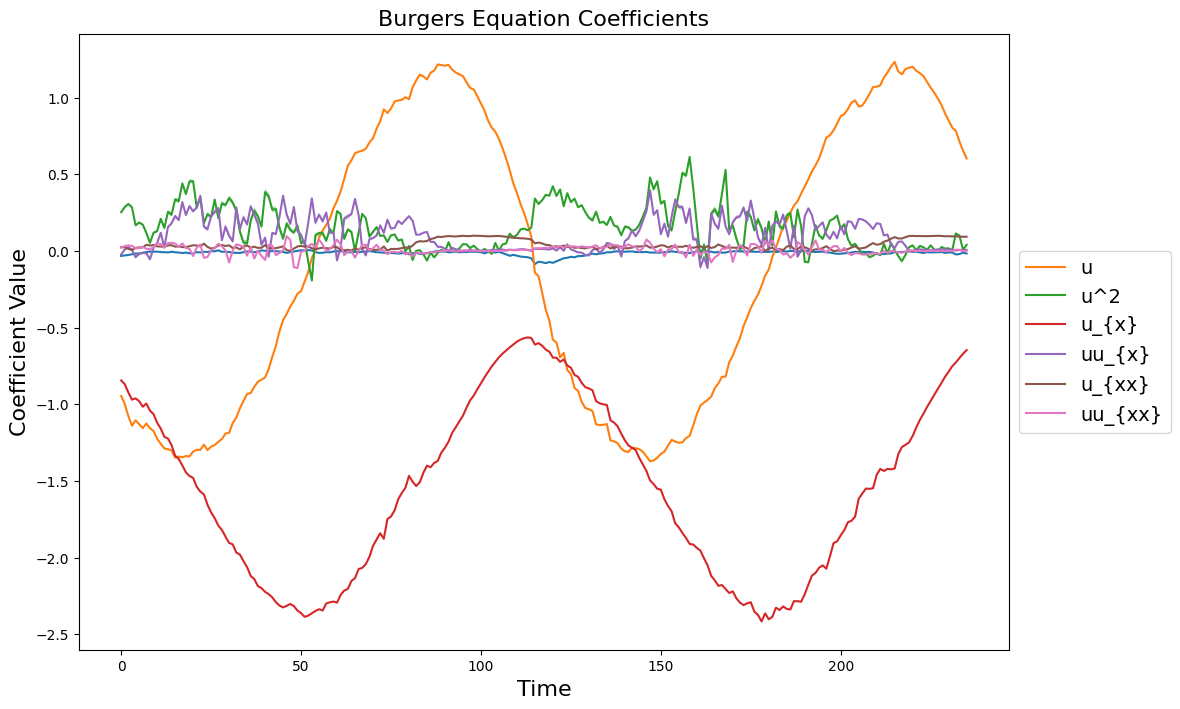

In [12]:
d = len(rhs_des)
xi_true = np.zeros((len(rhs_des),m))
i_u = [i for i in range(len(rhs_des)) if rhs_des[i] == 'u'][0]
i_u_x = [i for i in range(len(rhs_des)) if rhs_des[i] == 'u_{x}'][0]
i_u_xx = [i for i in range(len(rhs_des)) if rhs_des[i] == 'u_{xx}'][0]

xi_true[i_u,:] = u_true
xi_true[i_u_x,:] = u_x_true
xi_true[i_u_xx,:] = u_xx_true
xi_bglss = np.zeros((d, m2))

pylab.rcParams['figure.figsize'] = (12, 8)
for j in range(xi_n.shape[0]): 
    if np.linalg.norm(xi_n[j,:]) > 10**-10:
        plot(xi_n[j,:], label = rhs_des[remain_n[j]])
        fill_between(range(len(xi_n[j,:])), ci_n[1][j, :], ci_n[0][j, :], alpha=0.4)
        xi_bglss[remain_n[j], :] = xi_n[j,:]

title('Burgers Equation Coefficients', fontsize = 16)
xlabel('Time', fontsize = 16)
ylabel('Coefficient Value', fontsize = 16)
legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 14)

mse_noise_tbglss = Norm(xi_bglss-xi_true[:,wt:-wt])**2/(m2*len(rhs_des))
print('MSE: ', mse_noise_tbglss)

In [13]:
groupError(coef_n, m2)

array([6.76896743e-02, 6.31022667e-04, 2.00588326e-01, 1.46982667e-04,
       2.46546938e-01, 2.01412214e-02, 7.79770754e-01])

In [14]:
X_n1, Lam_n1, Losses_n1, Coef_n1, Remain_n1, TE_n1, Threshold_n1 = TrainBGLSS_findt1(Thetan_grouped, Utn_grouped, num_threshold = 21, max_threshold = 0.1, min_threshold = 0, niter = 600, burnin = 100)

[0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06, 0.065, 0.07, 0.075, 0.08, 0.085, 0.09, 0.095, 0.1]
threshold:
0.0
0
20
Update:
0
Lambda2:
1.2564955109783547

Update:
1
Lambda2:
1.402575634473353

Update:
2
Lambda2:
1.4905427578034403

Update:
3
Lambda2:
1.5527992631447678

Update:
4
Lambda2:
1.5958833545916142

Update:
5
Lambda2:
1.6304451964204503

Update:
6
Lambda2:
1.6479788385035306

Update:
7
Lambda2:
1.671543279734447

Update:
8
Lambda2:
1.684309186979752

Update:
9
Lambda2:
1.6892072981857802

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141


In [15]:
MSEs_n1 = getMSEs(X_n1, Remain_n1, xi_true[:,wt:-wt])

In [16]:
print(X_n1[0].shape)

(9, 236)


In [17]:
print(Remain_n1[0])

[0, 1, 2, 4, 5, 8, 9, 12, 16]


In [18]:
xi_true[:,wt:-wt].shape

(20, 236)

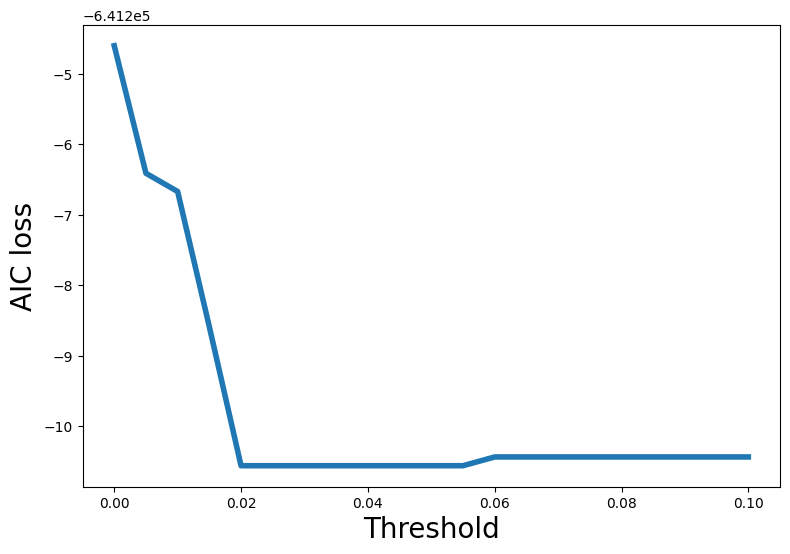

In [19]:
pylab.rcParams['figure.figsize'] = (9, 6)
fig, ax = plt.subplots()
ax.plot(Threshold_n1, Losses_n1, label = 'threshold1 = 0', linewidth=4.0)
xlabel('Threshold', fontsize = fontsize)
ylabel('AIC loss', fontsize = fontsize)
plt.rcParams.update({'font.size': fontsize})
fig.savefig("Losses-1.pdf")

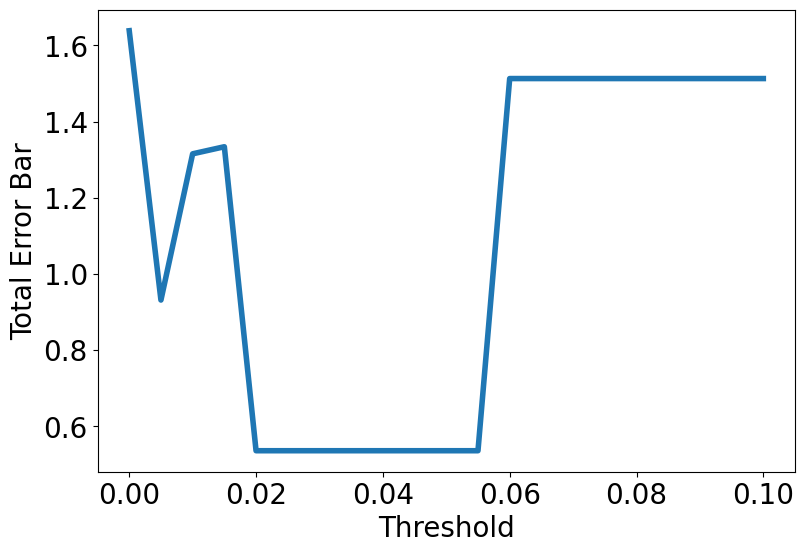

In [20]:
pylab.rcParams['figure.figsize'] = (9, 6)
fig, ax = plt.subplots()
# ax.set_yscale('log')
ax.plot(Threshold_n1, TE_n1, label = 'threshold1 = 0', linewidth=4.0)
xlabel('Threshold', fontsize = fontsize)
ylabel('Total Error Bar', fontsize = fontsize)
# pylab.show()
plt.rcParams.update({'font.size': fontsize})
fig.savefig("TE-1.pdf")

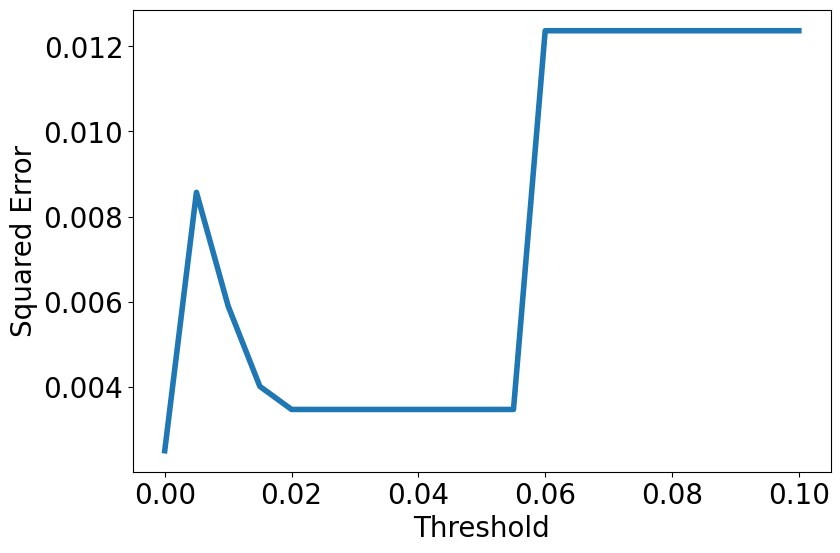

In [21]:
pylab.rcParams['figure.figsize'] = (9, 6)
fig, ax = plt.subplots()
# ax.set_yscale('log')
MSEs_n1 = np.array(MSEs_n1)
ax.plot(Threshold_n1, MSEs_n1, label = 'threshold1 = 0', linewidth=4.0)
xlabel('Threshold', fontsize = fontsize)
ylabel('Squared Error', fontsize = fontsize)
# pylab.show()
plt.rcParams.update({'font.size': fontsize})
fig.savefig("MSE-1.pdf")

In [23]:
print(Remain_n1[0])
print(rhs_des)
print([[rhs_des[tt] for tt in terms] for terms in Remain_n1])
print(len(Threshold_n1), len(Remain_n1))
tt_prob = 10
print(Threshold_n1[tt_prob],[rhs_des[tt] for tt in Remain_n1[tt_prob]])
print(Remain_n1[tt_prob])
print(TE_n1)
print(X_n1[1][4])

[0, 1, 2, 4, 5, 8, 9, 12, 16]
['', 'u', 'u^2', 'u^3', 'u_{x}', 'uu_{x}', 'u^2u_{x}', 'u^3u_{x}', 'u_{xx}', 'uu_{xx}', 'u^2u_{xx}', 'u^3u_{xx}', 'u_{xxx}', 'uu_{xxx}', 'u^2u_{xxx}', 'u^3u_{xxx}', 'u_{xxxx}', 'uu_{xxxx}', 'u^2u_{xxxx}', 'u^3u_{xxxx}']
[['', 'u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}', 'uu_{xx}', 'u_{xxx}', 'u_{xxxx}'], ['', 'u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}', 'uu_{xx}', 'u_{xxx}'], ['', 'u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}', 'uu_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}', 'uu_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}', 'u_{xx}'], ['u', 'u^2', 'u_{x}', 'uu_{x}'], ['u', 'u^2', 'u_{x}', 'uu_{x}'], ['u', 'u^2', 'u_{x}', 'uu_{x}'], ['u', 'u^2', 'u_{x}', 'uu_{x}'], ['u', 'u^2'